In [1]:
import os
import pandas as pd

In [22]:
new_lineageGrp = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/new_lineageGrp.csv',index_col=1)
new_lineageGrp.index = [ 'C'+str(clone) for clone in new_lineageGrp.index] 
new_lineageGrp['new_lineageGrp'] = [ 'C'+str(clone) for clone in new_lineageGrp['new_lineageGrp']]

In [23]:
new_lineageGrp

,new_lineageGrp
C1,C1
C2,C2
C3,C3
C7,C4
C5,C5
...,...
C158,C171
C157,C172
C163,C173
C165,C174


# EE&LE

In [24]:
files = os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/')
files

['C35-153_cell_transition_ALL_S2_S3a.csv',
 'C49-194_cell_transition_ALL_S2_S3a.csv',
 'C6-1249_cell_transition_ALL_S2_S3a.csv',
 'C40-270_cell_transition_ALL_S2_S3a.csv',
 'C28-540_cell_transition_ALL_S2_S3a.csv',
 'C46-183_cell_transition_ALL_S2_S3a.csv',
 'C32-298_cell_transition_ALL_S2_S3a.csv',
 'C26-296_cell_transition_ALL_S2_S3a.csv',
 'C14-573_cell_transition_ALL_S2_S3a.csv',
 'C8-891_cell_transition_ALL_S2_S3a.csv',
 'C2-4397_cell_transition_ALL_S2_S3a.csv',
 'C30-233_cell_transition_ALL_S2_S3a.csv',
 'C10-793_cell_transition_ALL_S2_S3a.csv',
 'C36-374_cell_transition_ALL_S2_S3a.csv',
 'C16-577_cell_transition_ALL_S2_S3a.csv',
 'C42-178_cell_transition_ALL_S2_S3a.csv',
 'C69-123_cell_transition_ALL_S2_S3a.csv',
 'C7-2304_cell_transition_ALL_S2_S3a.csv',
 'C11-400_cell_transition_ALL_S2_S3a.csv',
 'C82-171_cell_transition_ALL_S2_S3a.csv',
 'C15-405_cell_transition_ALL_S2_S3a.csv',
 'C20-341_cell_transition_ALL_S2_S3a.csv',
 'C27-255_cell_transition_ALL_S2_S3a.csv',
 'C95-105_ce

In [25]:
transition_file = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/'+ 'C3-3297_cell_transition_ALL_S2_S3a.csv',index_col=0)
transition_file['state'] = transition_file.columns
transition_file_long = transition_file.melt(id_vars='state', var_name='future', value_name='value')
transition_file_long.columns = ['current','future','test']
transition_file_long.index = transition_file_long['current']+'_'+transition_file_long['future']

In [26]:
df_all = transition_file_long[['current','future']]
for transition_file in files:
    if transition_file == 'T1':
        continue
    clone = transition_file.split('-')[0]
    clone = new_lineageGrp.loc[str(clone),'new_lineageGrp']
    transition_file = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/'+ transition_file,index_col=0)
    if 'V1' in transition_file.columns or 'V1' in transition_file.index:
        print(transition_file)
    transition_file.columns = transition_file.index.astype('str').to_list()
    transition_file['state'] = transition_file.index.astype('str').to_list()
    transition_file_long = transition_file.melt(id_vars='state', var_name='future', value_name='value')
    transition_file_long.columns = ['current','future',clone]
    transition_file_long.index = transition_file_long['current']+'_'+transition_file_long['future']
    #break
    df_all = pd.merge(df_all,transition_file_long,on=['current','future'],how='outer')

         V1        V2        V3
1  0.211102  0.733965  0.054932
2  0.019758  0.910867  0.069374
3  0.095143  0.762748  0.142109


In [27]:
transition_file

,1,2,3,5,state
1,0.608815,0.111710,0.246783,0.032692,1
2,0.046751,0.732135,0.220221,0.000894,2
3,0.091223,0.194514,0.706206,0.008057,3
5,0.443680,0.028976,0.295805,0.231538,5


In [28]:
df_all = df_all[df_all['current']!='4']
df_all = df_all[df_all['future']!='4']
df_all.index = df_all['current']+'_'+df_all['future']
df_all = df_all.iloc[:,2:48]
df_all = df_all.fillna(0)
df_all = df_all[~df_all.index.isin(['1_1','2_2','3_3','5_5'])]
df_all

,C37,C40,C7,C21,C16,C49,C24,C23,C17,C11,...,C42,C68,C57,C6,C41,C28,C14,C36,C47,C12
2_1,0.108385,0.072907,0.104238,0.126116,0.000000,0.081283,0.036921,0.080938,0.000000,0.038368,...,0.063751,0.098021,0.021818,0.029001,0.152783,0.123652,0.055278,0.067045,0.019758,0.046751
3_1,0.183220,0.189787,0.183005,0.123595,0.150656,0.101099,0.093072,0.159440,0.000000,0.100473,...,0.066396,0.103604,0.070552,0.081443,0.131000,0.163336,0.112291,0.138055,0.095143,0.091223
5_1,0.101870,0.303308,0.188548,0.018570,0.000000,0.017802,0.000000,0.442788,0.000000,0.273119,...,0.000000,0.318541,0.054618,0.260329,0.068577,0.156018,0.266531,0.057032,0.000000,0.443680
1_2,0.118950,0.046234,0.207975,0.311788,0.000000,0.244590,0.259896,0.045439,0.000000,0.089280,...,0.342660,0.051590,0.052727,0.102867,0.237216,0.156497,0.090191,0.186912,0.733965,0.111710
3_2,0.197364,0.068259,0.257780,0.349949,0.200736,0.411100,0.326726,0.090885,0.000000,0.200314,...,0.211396,0.041470,0.279885,0.233027,0.219341,0.244069,0.240132,0.238397,0.762748,0.194514
5_2,0.000000,0.053631,0.242224,0.221075,0.000000,0.000000,0.187373,0.240757,0.109002,0.195516,...,0.000000,0.016432,0.745160,0.490001,0.271760,0.219207,0.171308,0.305920,0.000000,0.028976
1_3,0.237108,0.273109,0.358971,0.151060,0.716200,0.125363,0.340081,0.352446,0.000000,0.303352,...,0.265585,0.289001,0.171172,0.465687,0.286132,0.237348,0.367899,0.221725,0.054932,0.246783
2_3,0.232727,0.154895,0.253432,0.173009,0.263518,0.169407,0.169598,0.357861,0.000000,0.259911,...,0.157318,0.219790,0.280989,0.375650,0.308565,0.280228,0.482200,0.137337,0.069374,0.220221
5_3,0.562376,0.150512,0.343051,0.398885,0.000000,0.563670,0.492214,0.102765,0.032987,0.360127,...,0.000000,0.219766,0.000000,0.010968,0.419491,0.399355,0.295773,0.252571,0.000000,0.295805
1_5,0.006933,0.081375,0.022662,0.003095,0.000000,0.001586,0.000000,0.069914,0.000000,0.028888,...,0.000000,0.167653,0.014175,0.057851,0.009023,0.034129,0.115731,0.012098,0.000000,0.032692


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

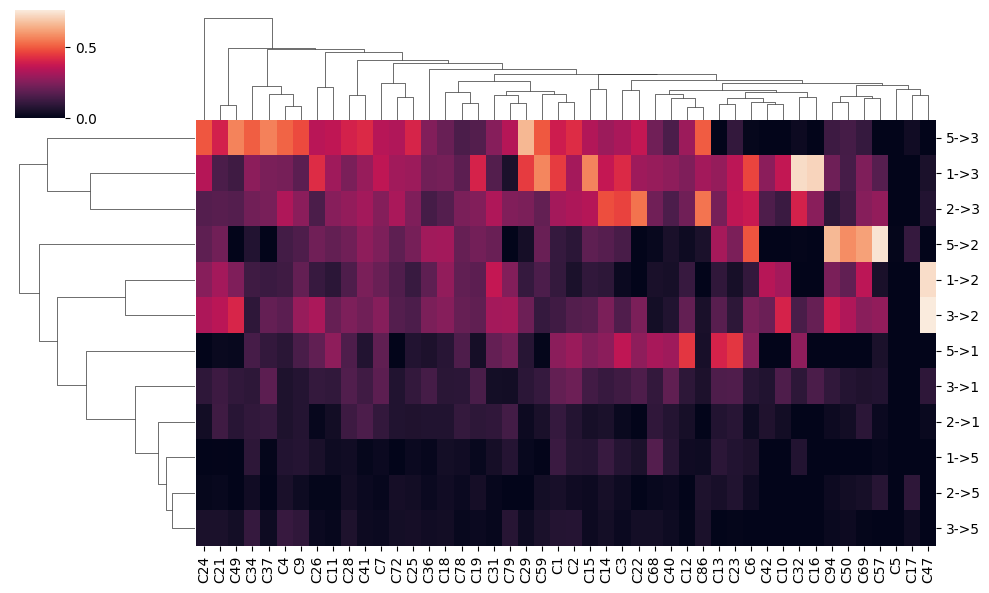

In [32]:
df_all.index = [ arrow.replace('_','->') for arrow in df_all.index]
g = sns.clustermap(df_all,row_cluster=True,col_cluster=True,yticklabels=True,xticklabels=True,figsize=[10,6])
g.ax_heatmap.invert_xaxis()
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3.sup/transition_heatmap_all_clone_T2T3.pdf')

# BL

In [33]:
import os
import pandas as pd

In [34]:
files = os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/T1/')
files

['C54-158_cell_transition_T1.csv',
 'C28-171_cell_transition_T1.csv',
 'C26-112_cell_transition_T1.csv',
 'C31-217_cell_transition_T1.csv',
 'C3-152_cell_transition_T1.csv',
 'C104-130_cell_transition_T1.csv',
 'C117-105_cell_transition_T1.csv',
 'C6-103_cell_transition_T1.csv',
 'C2-167_cell_transition_T1.csv',
 'C53-133_cell_transition_T1.csv',
 'C56-114_cell_transition_T1.csv',
 'C60-167_cell_transition_T1.csv',
 'C9-128_cell_transition_T1.csv',
 'C94-172_cell_transition_T1.csv',
 'C11-196_cell_transition_T1.csv',
 'C123-169_cell_transition_T1.csv',
 'C64-208_cell_transition_T1.csv',
 'C97-111_cell_transition_T1.csv',
 'C52-142_cell_transition_T1.csv',
 'C25-269_cell_transition_T1.csv',
 'C86-194_cell_transition_T1.csv',
 'C67-169_cell_transition_T1.csv',
 'C77-158_cell_transition_T1.csv',
 'C101-135_cell_transition_T1.csv',
 'C43-189_cell_transition_T1.csv',
 'C78-120_cell_transition_T1.csv',
 'C63-105_cell_transition_T1.csv',
 'C66-107_cell_transition_T1.csv',
 'C13-113_cell_trans

In [35]:
transition_file = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/T1/'+ 'C12-1177_cell_transition_T1.csv',index_col=0)
transition_file['state'] = transition_file.columns
transition_file_long = transition_file.melt(id_vars='state', var_name='future', value_name='value')
transition_file_long.columns = ['current','future','test']
transition_file_long.index = transition_file_long['current']+'_'+transition_file_long['future']

In [36]:
transition_file_long

,current,future,test
1_1,1,1,0.606555
2_1,2,1,0.085445
3_1,3,1,0.300550
1_2,1,2,0.098967
2_2,2,2,0.699928
3_2,3,2,0.253717
1_3,1,3,0.294478
2_3,2,3,0.214627
3_3,3,3,0.445734


In [37]:
df_all = transition_file_long[['current','future']]
for transition_file in files:
    clone = transition_file.split('-')[0]
    clone = new_lineageGrp.loc[str(clone),'new_lineageGrp']
    transition_file = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/T1/'+ transition_file,index_col=0)
    if 'V1' in transition_file.columns or 'V1' in transition_file.index:
        print(transition_file)
    transition_file.columns = transition_file.index.astype('str').to_list()
    transition_file['state'] = transition_file.index.astype('str').to_list()
    transition_file_long = transition_file.melt(id_vars='state', var_name='future', value_name='value')
    transition_file_long.columns = ['current','future',clone]
    transition_file_long.index = transition_file_long['current']+'_'+transition_file_long['future']
    #break
    df_all = pd.merge(df_all,transition_file_long,on=['current','future'],how='outer')

In [38]:
df_all 

,current,future,C44,C16,C23,C22,C3,C80,C97,C7,...,C84,C37,C91,C53,C52,C21,C1,C61,C71,C20
0,1,1,0.693210,0.814649,0.549330,0.409702,0.522675,0.629567,0.723039,0.822310,...,0.769114,0.600517,0.669243,0.614982,0.414197,0.592777,0.412013,0.697394,0.748027,0.616675
1,2,1,0.086126,NaN,0.028877,0.192658,0.037694,0.394441,0.273378,0.287630,...,0.571140,0.084184,0.100290,0.248314,0.103464,0.363045,0.129999,0.071219,0.104687,0.153568
2,3,1,0.163380,0.384603,0.247193,0.192342,0.127312,0.240784,0.262272,0.264507,...,NaN,0.135688,0.299147,0.164597,0.281192,0.065198,0.194339,0.608881,0.000000,0.272863
3,1,2,0.110733,NaN,0.013328,0.274003,0.127217,0.236665,0.182252,0.110156,...,0.230886,0.223089,0.078352,0.294057,0.284525,0.379931,0.220433,0.026707,0.251973,0.209059
4,2,2,0.642730,NaN,0.408817,0.496381,0.738904,0.396835,0.635139,0.594937,...,0.428860,0.782913,0.685238,0.611632,0.782707,0.467666,0.719768,0.911696,0.805778,0.739455
5,3,2,0.290512,NaN,0.146689,0.268939,0.274175,0.225421,0.168892,0.176150,...,NaN,0.270917,0.198585,0.300115,0.292162,0.423223,0.134692,0.014140,0.261570,0.228030
6,1,3,0.196056,0.185351,0.437342,0.316295,0.350108,0.133769,0.094709,0.067534,...,NaN,0.176395,0.252406,0.090962,0.301277,0.027292,0.367554,0.275899,0.000000,0.174265
7,2,3,0.271145,NaN,0.562306,0.310961,0.223402,0.208724,0.091483,0.117433,...,NaN,0.132903,0.214471,0.140054,0.113829,0.169289,0.150233,0.017085,0.089535,0.106977
8,3,3,0.546108,0.615397,0.606118,0.538719,0.598513,0.533795,0.568836,0.559343,...,NaN,0.593395,0.502268,0.535288,0.426646,0.511579,0.670969,0.376979,0.738430,0.499107


In [39]:
df_all = df_all[df_all['current']!='4']
df_all = df_all[df_all['future']!='4']
df_all.index = df_all['current']+'_'+df_all['future']
df_all = df_all.iloc[:,2:59]
df_all = df_all.fillna(0)
df_all = df_all[~df_all.index.isin(['1_1','2_2','3_3','5_5'])]
df_all

,C44,C16,C23,C22,C3,C80,C97,C7,C2,C63,...,C84,C37,C91,C53,C52,C21,C1,C61,C71,C20
2_1,0.086126,0.000000,0.028877,0.192658,0.037694,0.394441,0.273378,0.287630,0.111663,0.043256,...,0.571140,0.084184,0.100290,0.248314,0.103464,0.363045,0.129999,0.071219,0.104687,0.153568
3_1,0.163380,0.384603,0.247193,0.192342,0.127312,0.240784,0.262272,0.264507,0.146896,0.025872,...,0.000000,0.135688,0.299147,0.164597,0.281192,0.065198,0.194339,0.608881,0.000000,0.272863
1_2,0.110733,0.000000,0.013328,0.274003,0.127217,0.236665,0.182252,0.110156,0.141843,0.224147,...,0.230886,0.223089,0.078352,0.294057,0.284525,0.379931,0.220433,0.026707,0.251973,0.209059
3_2,0.290512,0.000000,0.146689,0.268939,0.274175,0.225421,0.168892,0.176150,0.158938,0.489657,...,0.000000,0.270917,0.198585,0.300115,0.292162,0.423223,0.134692,0.014140,0.261570,0.228030
1_3,0.196056,0.185351,0.437342,0.316295,0.350108,0.133769,0.094709,0.067534,0.190568,0.044688,...,0.000000,0.176395,0.252406,0.090962,0.301277,0.027292,0.367554,0.275899,0.000000,0.174265
2_3,0.271145,0.000000,0.562306,0.310961,0.223402,0.208724,0.091483,0.117433,0.162320,0.163219,...,0.000000,0.132903,0.214471,0.140054,0.113829,0.169289,0.150233,0.017085,0.089535,0.106977


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

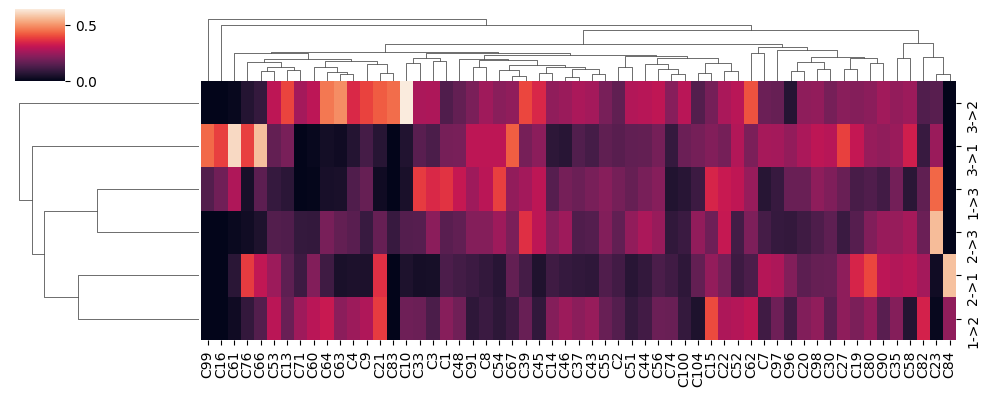

In [42]:
df_all.index = [ arrow.replace('_','->') for arrow in df_all.index]
g = sns.clustermap(df_all,row_cluster=True,col_cluster=True,yticklabels=True,xticklabels=True,figsize=[10,4])
g.ax_heatmap.invert_xaxis()
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3.sup/transition_heatmap_all_clone_T1.pdf')
